In [1]:
# Import necessary libraries
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/retail-dataset-2-0/stores data-set.csv
/kaggle/input/retail-dataset-2-0/Features data set.csv
/kaggle/input/retail-dataset-2-0/sales data-set.csv


<Axes: >

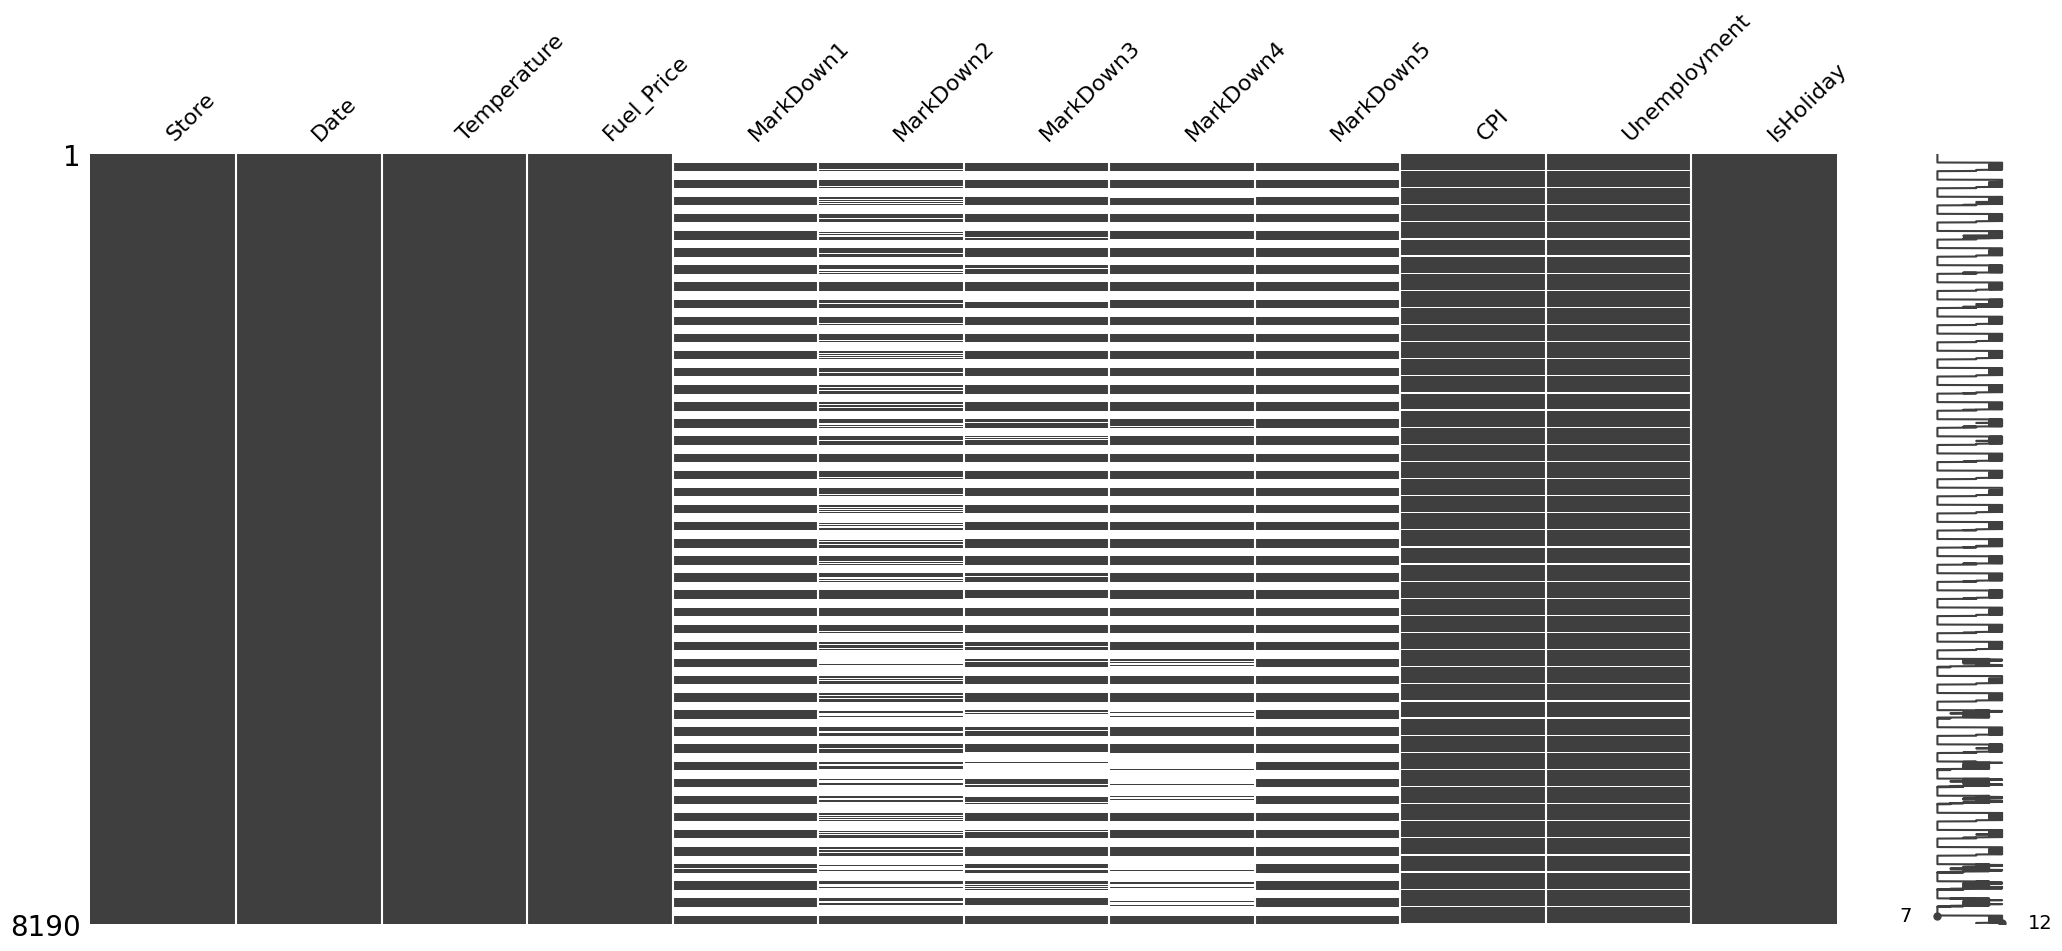

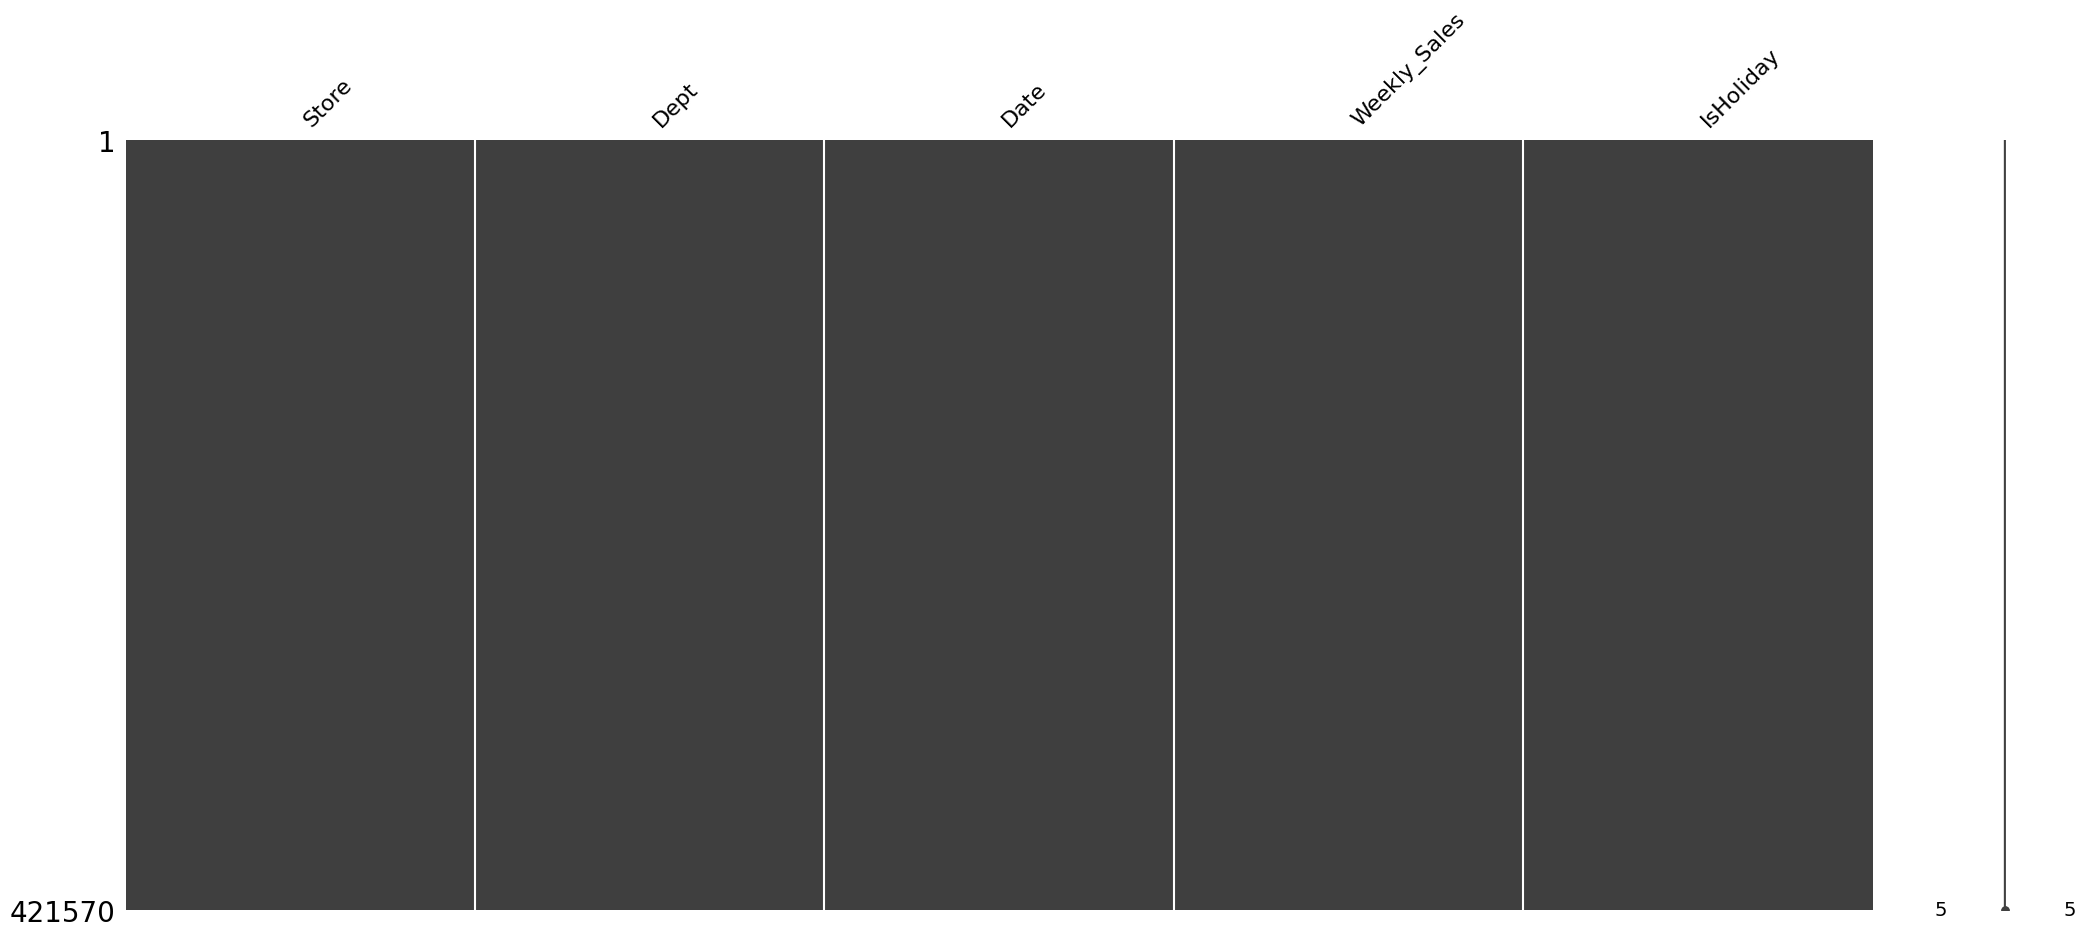

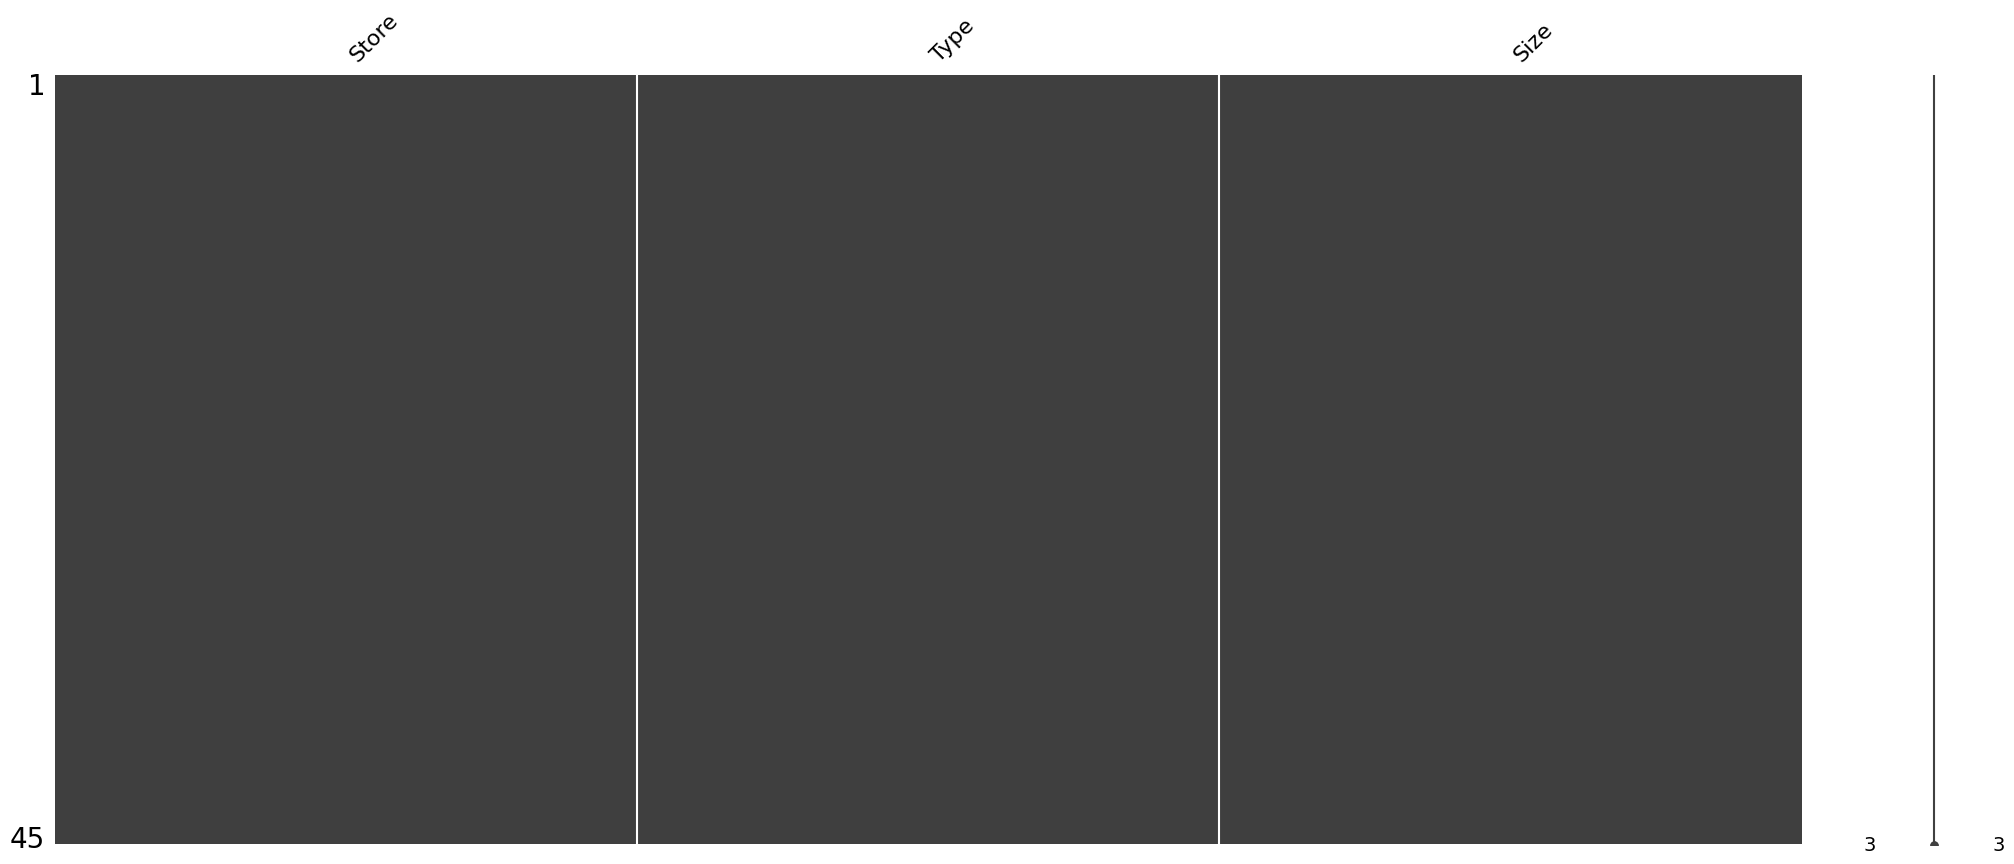

In [2]:
# Load data
sales = pd.read_csv('/kaggle/input/retail-dataset-2-0/sales data-set.csv')
stores = pd.read_csv('/kaggle/input/retail-dataset-2-0/stores data-set.csv')
features = pd.read_csv('/kaggle/input/retail-dataset-2-0/Features data set.csv')

# Identify columns with missing values
msno.matrix(features)
msno.matrix(sales)
msno.matrix(stores)

           MarkDown1      MarkDown2      MarkDown3     MarkDown4  \
count    4032.000000    2921.000000    3613.000000   3464.000000   
mean     7032.371786    3384.176594    1760.100180   3292.935886   
std      9262.747448    8793.583016   11276.462208   6792.329861   
min     -2781.450000    -265.760000    -179.260000      0.220000   
25%      1577.532500      68.880000       6.600000    304.687500   
50%      4743.580000     364.570000      36.260000   1176.425000   
75%      8923.310000    2153.350000     163.150000   3310.007500   
max    103184.980000  104519.540000  149483.310000  67474.850000   

           MarkDown5  
count    4050.000000  
mean     4132.216422  
std     13086.690278  
min      -185.170000  
25%      1440.827500  
50%      2727.135000  
75%      4832.555000  
max    771448.100000  


<Axes: >

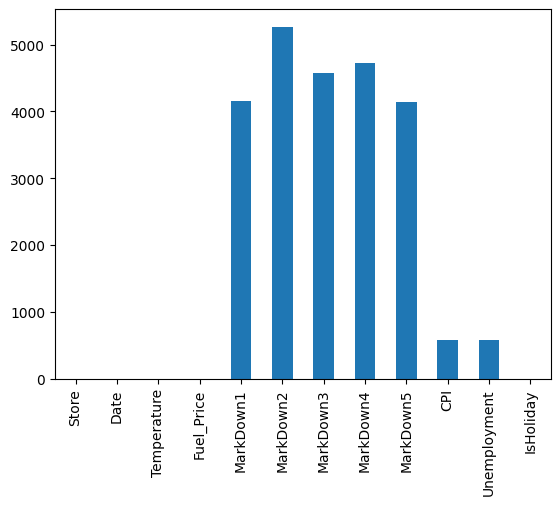

In [3]:
# Inspecting the distribution of the MarkDowns
print(features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].describe())
features.isna().sum().plot(kind='bar')

This code inspects the distribution of MarkDown columns (discount-related features) using **SUMMARY STATISTICS** and visualizes the count of missing values across all columns in the features dataset. It helps assess **data quality**** and understand the impact of markdowns on sales.

<Axes: >

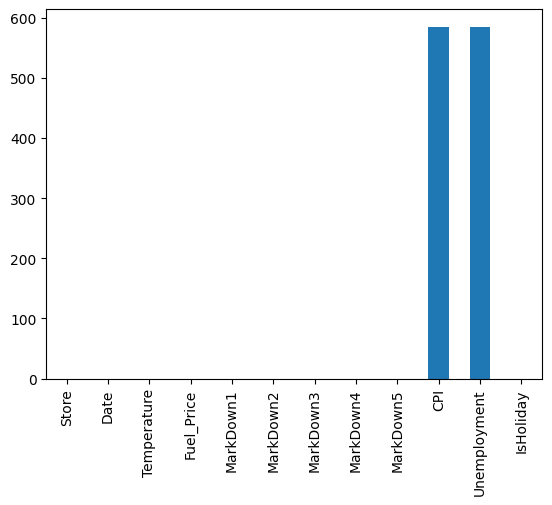

In [5]:
# Filling missing values of the MarkDowns
features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = (
    features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]
    .ffill()
    .fillna(0)
)

features.isna().sum().plot(kind='bar')

This code fills missing values in the MarkDown columns using forward fill (*ffill*) and replaces any remaining **NaN** values with *0*. It then visualizes the remaining missing values to confirm successful *handling of null data*.

count    7605.000000
mean      172.460809
std        39.738346
min       126.064000
25%       132.364839
50%       182.764003
75%       213.932412
max       228.976456
Name: CPI, dtype: float64


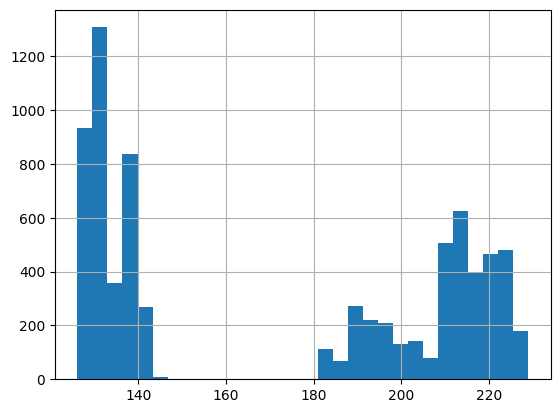

count    7605.000000
mean        7.826821
std         1.877259
min         3.684000
25%         6.634000
50%         7.806000
75%         8.567000
max        14.313000
Name: Unemployment, dtype: float64


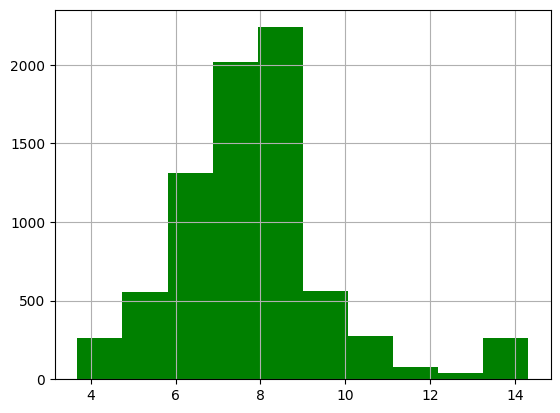

In [6]:
# Inspect the distribution of CPI 
print(features['CPI'].describe())
features['CPI'].hist(bins=30)
plt.show()

# Inspect the distribution of Unemployment
print(features['Unemployment'].describe())
features['Unemployment'].hist(color='g')
plt.show()

This code inspects the distribution of CPI (Consumer Price Index) and Unemployment **features** using summary statistics and histograms. It provides insights into the **central tendency, spread, and shape** of these economic indicators.

count    8190.000000
mean      172.475484
std        39.229358
min       126.064000
25%       132.546355
50%       182.141500
75%       213.577670
max       228.976456
Name: CPI, dtype: float64


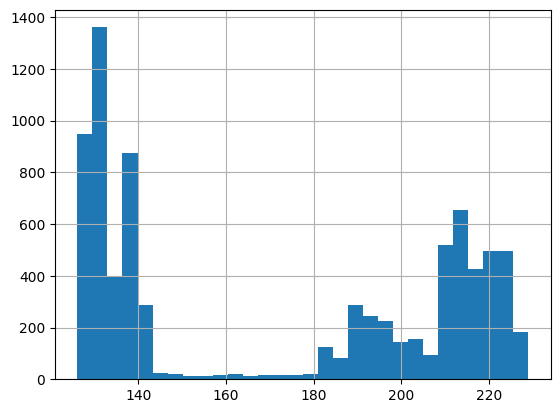

count    8190.000000
mean        7.825334
std         1.808971
min         3.684000
25%         6.833000
50%         7.806000
75%         8.519000
max        14.313000
Name: Unemployment, dtype: float64


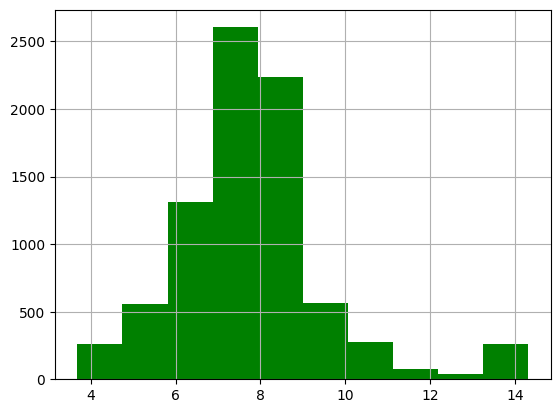

In [7]:
# Filling the missing values of CPI
features['CPI'] = features['CPI'].interpolate(method='linear')

# Filling the misssing values of Unemployment
features['Unemployment'] = features['Unemployment'].fillna(features['Unemployment'].median())

# Inspecting the distribution of CPI one more time
print(features['CPI'].describe())
features['CPI'].hist(bins=30)
plt.show()

# Inspecting the distribution of Unemployment one more time
print(features['Unemployment'].describe())
features['Unemployment'].hist(color='g')
plt.show()

This code fills missing values in the CPI column using linear interpolation and **replaces** missing Unemployment values with the median. It then re-inspects the distributions of both features to confirm the handling of missing data and **ensure data quality**.

<class 'pandas.core.series.Series'>
RangeIndex: 421570 entries, 0 to 421569
Series name: Weekly_Sales
Non-Null Count   Dtype  
--------------   -----  
421570 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB
None
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


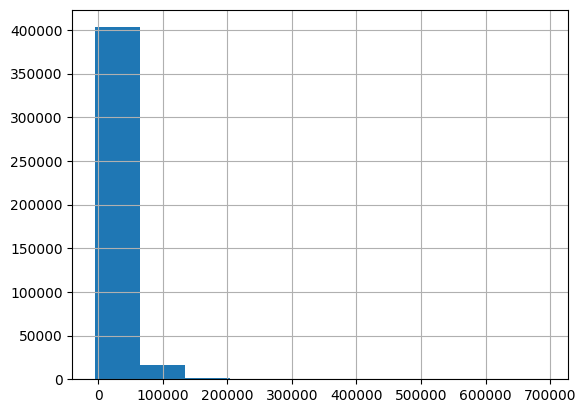

In [8]:
print(sales['Weekly_Sales'].info())
print(sales['Weekly_Sales'].describe())
sales['Weekly_Sales'].hist(bins=10)
plt.show()

This code inspects the Weekly_Sales column by displaying its **metadata, summary statistics, and distribution using a histogram**. It provides insights into the range, central tendency, and spread of weekly sales data.

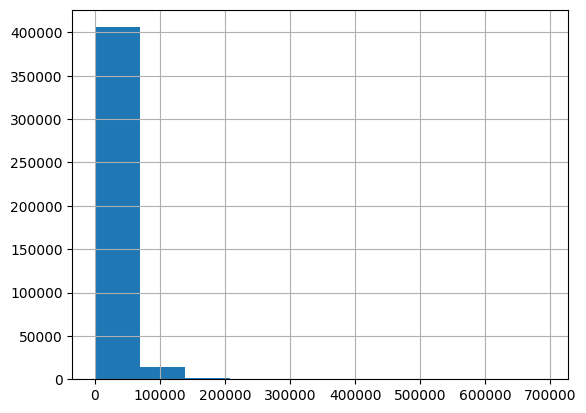

<class 'pandas.core.series.Series'>
RangeIndex: 421570 entries, 0 to 421569
Series name: Weekly_Sales
Non-Null Count   Dtype  
--------------   -----  
421570 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB
None
count    421570.000000
mean      16004.705125
std       22698.616375
min           0.000000
25%        2130.877500
50%        7649.590000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


In [9]:
# Imputing negative values with median sales of the same week
median_sales_by_week = sales.groupby('Date')['Weekly_Sales'].median()
sales['Weekly_Sales'] = sales.apply(
    lambda row: median_sales_by_week[row['Date']] if row['Weekly_Sales'] < 0 else row['Weekly_Sales'], axis=1
)

sales['Weekly_Sales'].hist(bins=10)
plt.show()
print(sales['Weekly_Sales'].info())
print(sales['Weekly_Sales'].describe())

This code replaces negative values in the Weekly_Sales column with the **median** sales of the corresponding week. It then re-inspects the distribution and summary statistics of Weekly_Sales to ensure data consistency and 

In [10]:
# Using IQR to detect outliers
Q1 = sales['Weekly_Sales'].quantile(0.25)
Q3 = sales['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
sales['Weekly_Sales'] = sales['Weekly_Sales'].clip(lower=lower_bound, upper=upper_bound)
print(sales['Weekly_Sales'].info())
print(sales['Weekly_Sales'].describe())

<class 'pandas.core.series.Series'>
RangeIndex: 421570 entries, 0 to 421569
Series name: Weekly_Sales
Non-Null Count   Dtype  
--------------   -----  
421570 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB
None
count    421570.000000
mean      13666.367807
std       14878.630382
min           0.000000
25%        2130.877500
50%        7649.590000
75%       20205.852500
max       47318.315000
Name: Weekly_Sales, dtype: float64


This code detects outliers in the Weekly_Sales column using the **Interquartile Range (IQR) method and caps them to the lower and upper bounds**. It then re-inspects the column's metadata and summary statistics to confirm the handling of outliers.

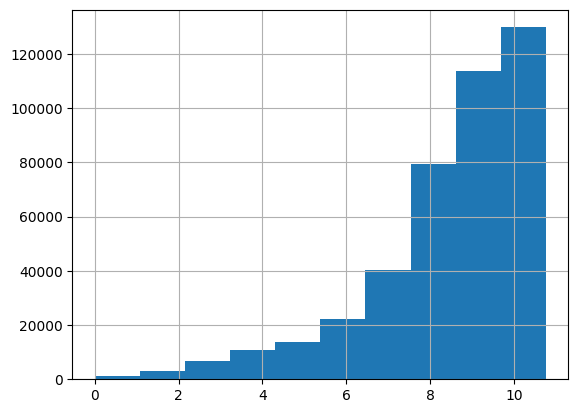

<class 'pandas.core.series.Series'>
RangeIndex: 421570 entries, 0 to 421569
Series name: Weekly_Sales_Log
Non-Null Count   Dtype  
--------------   -----  
421570 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB
None
count    421570.000000
mean          8.494306
std           1.976751
min           0.000000
25%           7.664758
50%           8.942538
75%           9.913777
max          10.764674
Name: Weekly_Sales_Log, dtype: float64


In [11]:
# Log transformation
sales['Weekly_Sales_Log'] = np.log1p(sales['Weekly_Sales'])

sales['Weekly_Sales_Log'].hist(bins=10, grid=10)
plt.show()
print(sales['Weekly_Sales_Log'].info())
print(sales['Weekly_Sales_Log'].describe())

This code applies a **log transformation (log1p)** to the Weekly_Sales column to **reduce skewness and normalize its distribution**. It then visualizes and inspects the transformed data to confirm the effectiveness of the transformation.

In [ ]:
from statsmodels.tsa.stattools import adfuller
import dask.dataframe as dd

result = adfuller(sales['Weekly_Sales_Log'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("Stationary data")
else:
    print("Non-stationary data")

I use the **Augmented Dickey-Fuller (ADF)** test to check if the log-transformed Weekly_Sales data is stationary. Based on the p-value, I determine whether the data is **stationary (p ≤ 0.05) or non-stationary, which is crucial for time series modeling.**

In [12]:
# Converting the 'Date' column to datetime format
features['Date'] = pd.to_datetime(features['Date'], format='mixed', dayfirst=True)

# Create new time-series features
features['Year'] = features['Date'].dt.year
features['Month'] = features['Date'].dt.month
features['Week'] = features['Date'].dt.isocalendar().week
features['DayOfWeek'] = features['Date'].dt.dayofweek

I convert the Date column to a datetime format and **extract new time-series features** such as Year, Month, Week, and DayOfWeek. These features **help capture temporal patterns** and improve the **predictive power** of my sales forecasting model.

In [13]:
# Enabling future behavior for silent downcasting
pd.set_option('future.no_silent_downcasting', True)

# Converting 'Date' column to datetime format in sales dataset
sales['Date'] = pd.to_datetime(sales['Date'], format='mixed', dayfirst=True, errors='coerce')

# Merging sales, features, and stores datasets on common columns
merged_data = sales.merge(features, on=['Store', 'Date'], how='left')
merged_data = merged_data.merge(stores, on='Store', how='inner')

# Sorting the data for time-series analysis
merged_data.sort_values(by=['Dept', 'Store', 'Date'], inplace=True)

# Setting the 'Date' column as the index for resampling
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.set_index('Date', inplace=True)

# Aggregating weekly sales by Dept and store
weekly_sales = (
    merged_data.groupby(['Dept', 'Store', 'Date'])
    ['Weekly_Sales_Log'] 
    .sum()          
    .reset_index()
)
weekly_sales.to_csv('weekly_sales.csv', index=False)

# Creating a complete date range for each product and store
date_range = pd.date_range(
    start=merged_data.index.min(), 
    end=merged_data.index.max(), 
    freq='W'
)

# Adjusting the grouping and reindexing process
complete_data = (
    merged_data.groupby(['Dept', 'Store'])
    .apply(
        lambda group: group.reindex(date_range).fillna(0).infer_objects(copy=False).reset_index(), include_groups=False
    )
    .reset_index(drop=True)
)

# Renaming the date column
complete_data.rename(columns={'index': 'Date'}, inplace=True)
complete_data.to_csv('complete_data.csv', index=False)



I prepare the data for **time-series analysis** by converting the `Date` column to datetime format and merging the `sales`, `features`, and `stores` datasets. I then sort and **aggregate weekly sales by department and store**, ensuring no gaps in the date range. **Finally, I create a complete dataset with consistent weekly intervals, filling missing values and saving the results for further analysis**. This structured approach ensures my sales forecasting model has clean, continuous, and well-organized data.



In [14]:
print(weekly_sales.info())  # Ensuring 'Date' is in the columns
print(weekly_sales['Weekly_Sales_Log'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Dept              421570 non-null  int64         
 1   Store             421570 non-null  int64         
 2   Date              421570 non-null  datetime64[ns]
 3   Weekly_Sales_Log  421570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 12.9 MB
None
count    421570.000000
mean          8.494306
std           1.976751
min           0.000000
25%           7.664758
50%           8.942538
75%           9.913777
max          10.764674
Name: Weekly_Sales_Log, dtype: float64


I verify the structure of the weekly_sales dataset by checking its metadata and summary statistics for the Weekly_Sales_Log column. This ensures the data is correctly formatted and **ready for time-series modeling and analysis.**

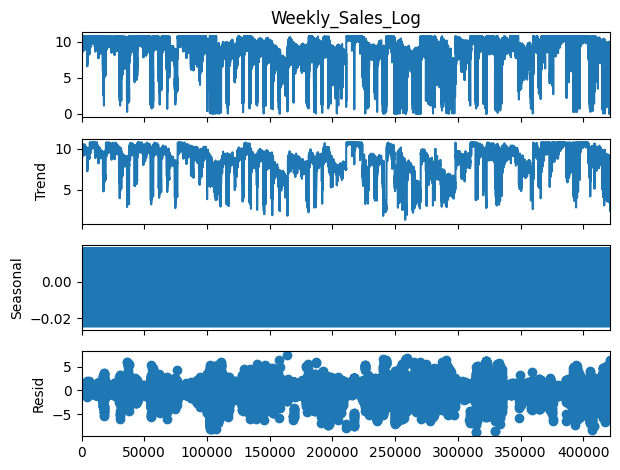

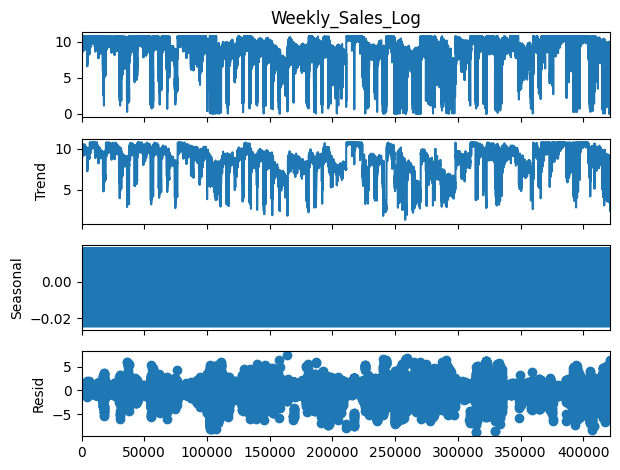

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(weekly_sales['Weekly_Sales_Log'], model='additive', period=52)  # Weekly rate
decomposed.plot()

**I perform seasonal decomposition on the Weekly_Sales_Log data to break it down into its core components: trend, seasonality, and residuals. Using an additive model with a period of 52 weeks (reflecting yearly seasonality), I visualize these components to better understand underlying patterns. This analysis helps me identify trends and seasonal effects, which are critical for building accurate sales forecasting models.**

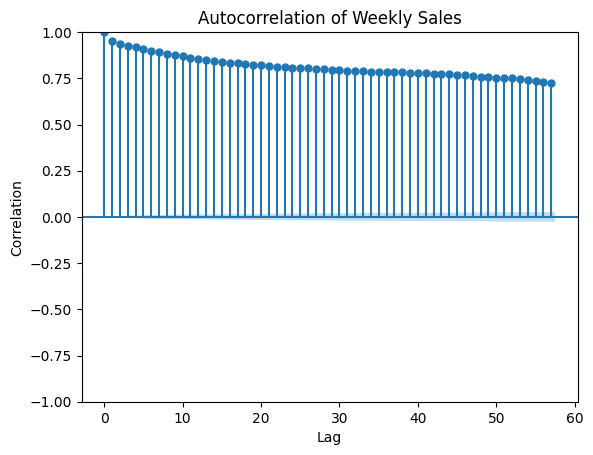

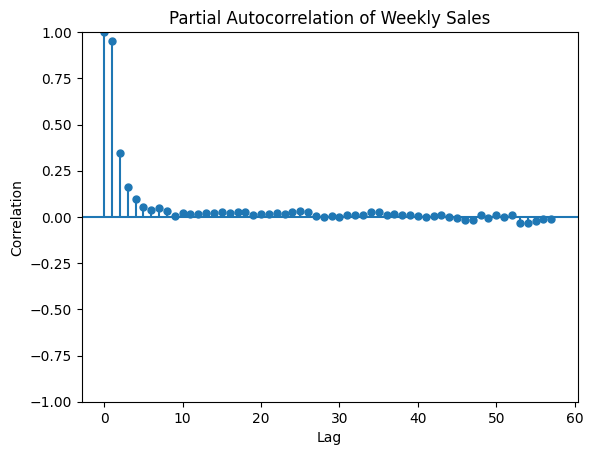

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Preparing the data
sales_data = pd.DataFrame({
    'ds': weekly_sales['Date'],  # Date column
    'y': weekly_sales['Weekly_Sales_Log']  # Target variable
})


# Plotting the Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF)
plot_acf(sales_data['y'])  # Adjusting 'lags' to suit my analysis
plt.title("Autocorrelation of Weekly Sales")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()
plot_pacf(sales_data['y'])
plt.title("Partial Autocorrelation of Weekly Sales")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

**I analyze the time-series structure of the Weekly_Sales_Log data by plotting the Autocorrelation Function (*ACF*) and Partial Autocorrelation Function (*PACF*). These plots help me identify the strength and lag of relationships within the data, which are essential for selecting appropriate parameters in time-series models like *ARIMA*. By understanding the correlation patterns, I can better capture dependencies and improve the accuracy of my sales forecasting model.**

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               351309
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -290554.019
Date:                Wed, 25 Dec 2024   AIC                         581116.039
Time:                        18:40:49   BIC                         581159.117
Sample:                             0   HQIC                        581128.415
                             - 351309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8904      0.001    904.307      0.000       0.888       0.892
ma.L1         -1.3526      0.001  -1217.511      0.000      -1.355      -1.350
ma.L2          0.3777      0.001    491.280      0.0

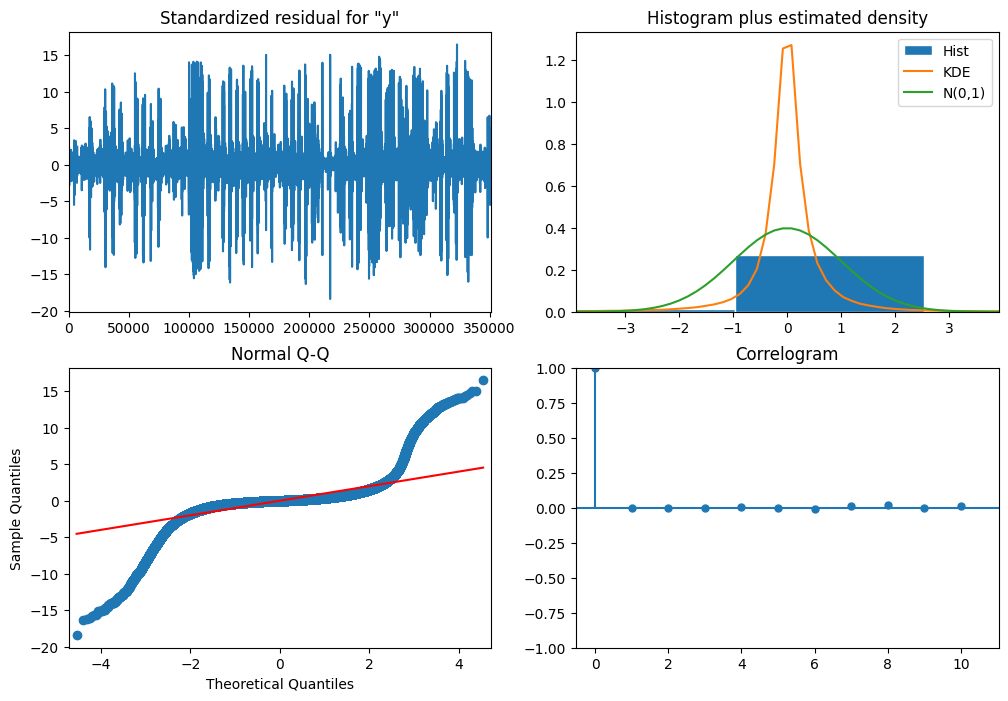

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit

# Spliting the data
tscv = TimeSeriesSplit(n_splits=5)  # A 5-fold time series cross-validation

for train_index, test_index in tscv.split(sales_data['y']): 
    train_data = sales_data['y'].iloc[train_index]
    test_data = sales_data['y'].iloc[test_index]


# Fiting the model
model = ARIMA(train_data, order=(1,1,2))
results = model.fit()

# Summary and diagnostics
print(results.summary())
results.plot_diagnostics(figsize=(12, 8))
plt.show()


**I implement an ARIMA model to analyze and forecast weekly sales data. Using a 5-fold time series cross-validation, I split the data into training and testing sets to ensure robust evaluation. The ARIMA model is fitted with parameters (1,1,2), capturing autoregressive, differencing, and moving average components. The model summary provides insights into the coefficients, their significance, and overall performance metrics like AIC and BIC. Diagnostic plots, including residuals, Q-Q, and correlogram, help assess the model's fit and identify potential issues like heteroskedasticity or non-normality. This comprehensive analysis ensures the model is well-suited for accurate sales forecasting.**

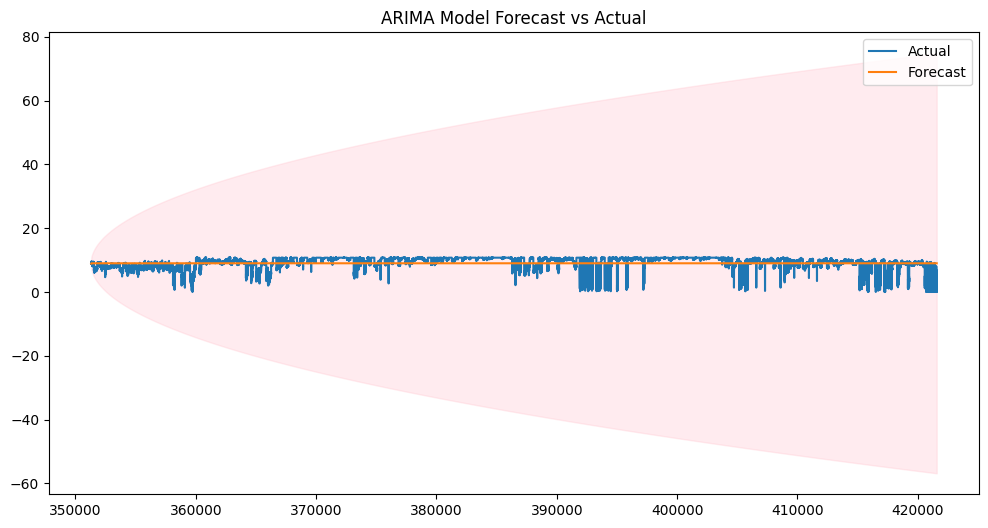

In [19]:
forecast = results.get_forecast(steps=len(test_data))
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()


plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast_values, label='Forecast')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('ARIMA Model Forecast vs Actual')
plt.show()


**I generate forecasts using the trained ARIMA model and compare them against the actual test data. The forecasted values, along with their confidence intervals, are plotted alongside the actual sales data to visually assess the model's accuracy. The shaded confidence interval provides a range of uncertainty, helping me understand the reliability of the predictions. This visualization highlights how well the model captures the underlying patterns in the data, ensuring its effectiveness for future sales forecasting.**

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
print(f"RMSE: {rmse}")

mae = mean_absolute_error(test_data, forecast_values)
print(f"MAE: {mae}")


RMSE: 1.9129098270979892
MAE: 1.4788690350543496




I evaluate the performance of the ARIMA model using key metrics: Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). These metrics quantify the difference between the forecasted and actual sales values, providing insights into the model's accuracy. The RMSE of **1.91** and MAE of **1.48** indicate relatively small prediction errors, suggesting that the model performs well in capturing the underlying patterns in the data. However, while the errors are low, I should also consider the scale of the `Weekly_Sales_Log` values to fully interpret these results. If the sales values are large, these errors might be acceptable, but further refinement (e.g., hyperparameter tuning or exploring alternative models) could still improve performance. Overall, the model shows promise for sales forecasting but leaves room for optimization.

